In [1]:
import numpy as np
import tkinter as tk
from tkinter import Label
from tkinter import *
from tkinter import ttk
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import math
from scipy.optimize import fsolve

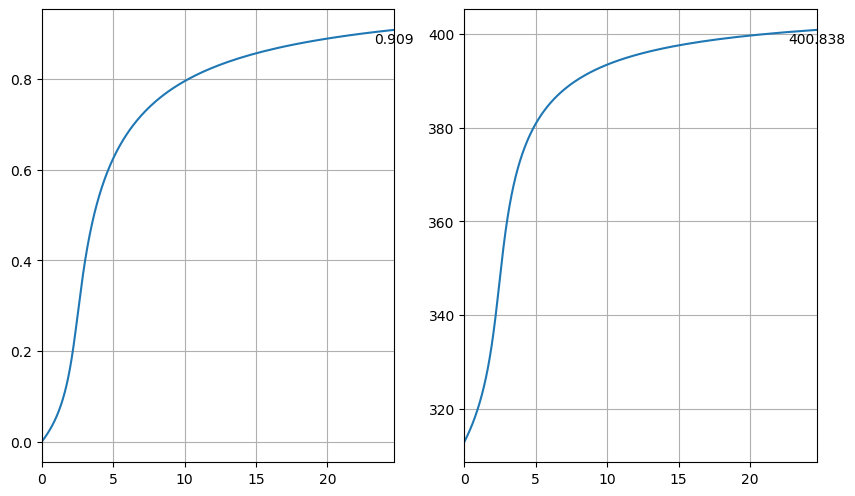

In [2]:
main = tk.Tk()
main.title('Kinetics and Reactor Design')
main.geometry('1300x700')

def graphwind():
    global CONV, FRV, PV, Graphs, CONPV, TV,CONVNEQCONV,T_CT
    # create Graphing window
    Graphs = Toplevel(main)
    Graphs.geometry('1000x1000')

    # variables
    CONV = IntVar()
    FRV = IntVar()
    PV = IntVar()
    CONPV = IntVar()
    TV = IntVar()
    CONVNEQCONV = IntVar()
    T_CT = IntVar()
    # checkbuttons/graph button
    CONVCB = Checkbutton(Graphs, text='Conversion with respect to volume', variable=CONV)
    FRVCB = Checkbutton(Graphs, text='Flow Rates with respect to volume', variable=FRV)
    PVCB = Checkbutton(Graphs, text='Pressure with respect to volume', variable=PV)
    CONPVCB = Checkbutton(Graphs, text='Conversion/Pressure with respect to volume', variable=CONPV)
    TVCB = Checkbutton(Graphs, text = 'Temperature with respect to volume',variable = TV)
    CONVEQCONVCB = Checkbutton(Graphs, text = 'Conversion and Equilibrium Conversion', variable = CONVNEQCONV)
    T_CTCB = Checkbutton(Graphs, text ='Temperature and Coolant Temperature',variabl = T_CT)
    GR = tk.Button(Graphs, text='Create graphs', command=graphtime, bg='black', fg='white')
    # packing Checkbuttons
    CONVCB.pack()
    FRVCB.pack()
    PVCB.pack()
    CONPVCB.pack()
    GR.pack()
    TVCB.pack()
    CONVEQCONVCB.pack()
    T_CTCB.pack()
    # placing checkbuttons
    CONVCB.place(x=20, y=10)
    PVCB.place(x=20, y=50)
    FRVCB.place(x=20, y=30)
    CONPVCB.place(x=20, y=70)
    TVCB.place(x=20,y=90)
    CONVEQCONVCB.place(x=20,y=110)
    T_CTCB.place(x=600,y=10)
    GR.place(x=400, y=10)
    
def graphtime():
    global fig, chart, CnP,CnEC,TnCT
    plotbois = [PV.get(), FRV.get(), CONV.get(), CONPV.get(), TV.get(), CONVNEQCONV.get(),T_CT.get()]
    CnP = []
    CnEC = []
    TnCT = []
    a = sum(plotbois)
    if a == 2:
        a1 = 1
        a2 = 2
    else:
        a1 = math.ceil(a / 2)
        a2 = a1
    c = 1
    fig = plt.figure(figsize=(5, 6), dpi=100)
    if plotbois[0] == 1:
        fig.add_subplot(a1, a2, c).plot(VOLUME, PRESSURE)
        LABELPRESSURE = "{}".format(round(PRESSURE[-1],3))
        plt.annotate(LABELPRESSURE,xy =(VOLUME[-1],PRESSURE[-1]),textcoords="offset points", xytext =(0,-10), ha='center')
        plt.grid(TRUE)
        plt.xlim(0,VOLUME[-1])
        c = c + 1
    if plotbois[1] == 1:
        fig.add_subplot(a1, a2, c).plot(VOLUME, FR)
        for i in range(len(lets)):
            LABELFLOWRATES = "{}".format(round(FR[-1][i],3))
            plt.annotate(LABELFLOWRATES,xy = (VOLUME[-1], FR[-1][i]),textcoords="offset points", xytext =(0, -10),ha='center')
        plt.grid(TRUE)
        plt.xlim(0, VOLUME[-1])
        c = c + 1
    if plotbois[2] == 1:
        fig.add_subplot(a1, a2, c).plot(VOLUME, XCONV)
        LABELCONVERSION = "{}".format(round(XCONV[-1],3))
        plt.annotate(LABELCONVERSION,xy= (VOLUME[-1], XCONV[-1]),textcoords="offset points", xytext =(0, -10),ha='center')
        plt.grid(TRUE)
        plt.xlim(0, VOLUME[-1])
        c = c + 1
    if plotbois[3] == 1:
        for i in range(len(VOLUME)):
            CnP.append([])
            CnP[i].append(XCONV[i])
            CnP[i].append(PRESSURE[i])
        fig.add_subplot(a1, a2, c).plot(VOLUME, CnP)
        LABELCONVERSIONP = "{}".format(round(CnP[-1][0],3))
        LABELPRESSUREC = "{}".format(round(CnP[-1][1],3))
        plt.annotate(LABELCONVERSIONP,xy= (VOLUME[-1], CnP[-1][0]),textcoords="offset points", xytext =(0, -10),ha='center')
        plt.annotate(LABELPRESSUREC, xy=(VOLUME[-1], CnP[-1][1]), textcoords="offset points", xytext=(0, -10),ha='center')
        plt.grid(TRUE)
        plt.xlim(0, VOLUME[-1])
        c = c + 1
    if plotbois[4] == 1:
        fig.add_subplot(a1,a2,c).plot(VOLUME , TEMPRANGE)
        LABELTEMPERATURE = "{}".format(round(TEMPRANGE[-1],3))
        plt.annotate(LABELTEMPERATURE,xy= (VOLUME[-1], TEMPRANGE[-1]),textcoords="offset points", xytext =(0, -10),ha='center')
        plt.grid(TRUE)
        plt.xlim(0, VOLUME[-1])
        c = c+1
    if plotbois[5] ==1:
        for i in range(len(VOLUME)):
            CnEC.append([])
            CnEC[i].append(XCONV[i])
            CnEC[i].append(EQUILCONVERSION[i])
        fig.add_subplot(a1, a2, c).plot(VOLUME, CnEC)
        LABELCONVERSIONEQ = "{}".format(round(CnEC[-1][0], 3))
        LABELEQCONVERSION = "{}".format(round(CnEC[-1][1], 3))
        plt.annotate(LABELCONVERSIONEQ, xy=(VOLUME[-1], CnEC[-1][0]), textcoords="offset points", xytext=(0, -10),
                     ha='center')
        plt.annotate(LABELEQCONVERSION, xy=(VOLUME[-1], CnEC[-1][1]), textcoords="offset points", xytext=(0, -10),
                     ha='center')
        plt.grid(TRUE)
        plt.xlim(0, VOLUME[-1])
        c = c+1
    if plotbois[6] ==1:
        for i in range(len(VOLUME)):
            TnCT.append([])
            TnCT[i].append(TEMPRANGE[i])
            TnCT[i].append(COOLANTTEMPRANGE[i])
        fig.add_subplot(a1,a2,c).plot(VOLUME,TnCT)
        LABELTEMPERATURE = "{}".format(round(TnCT[-1][0], 3))
        LABELCOOLANTTEMP = "{}".format(round(TnCT[-1][1], 3))
        plt.annotate(LABELTEMPERATURE, xy=(VOLUME[-1], TnCT[-1][0]), textcoords="offset points", xytext=(0, -10),
                     ha='center')
        plt.annotate(LABELCOOLANTTEMP, xy=(VOLUME[-1], TnCT[-1][1]), textcoords="offset points", xytext=(0, -10),
                     ha='center')
        plt.grid(TRUE)
        plt.xlim(0, VOLUME[-1])
        c = c+1
    chart = FigureCanvasTkAgg(fig, Graphs)
    chart.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.X)
    
def calctime():
    global y, XCONV, PRESSURE, FR, MRKK, cp, H, HRT,VOLUME,TEMPRANGE,ADIABATIC,COCURRENT,COUNTCURRENT,KVALINIT,KCVALINIT
    global CFIII, CFPPP, EQUILCONVERSION,THETAR,THETAP,NUR,NUP,COOLANTTEMPRANGE
    #Reset KVal and KcVal to being initial for continuity later in functions.
    KVALINIT = Kval
    KCVALINIT = Kcval
    #initialize new coefficient vectors because I appended them further in, need the originals and why not create more variables
    CFIII = CFIT
    CFPPP = CFPT
    def EQUILIBRIUMCONVERSION(EQC):
        return (CAO * (THETAR[0] + NUR[0] * EQC) * (THETAR[1] + NUR[1] * EQC) * (THETAR[2] + NUR[2] * EQC) * (THETAR[3] + NUR[3] * EQC) - (
                        (THETAP[0] + NUP[0] * EQC) * (THETAP[1] + NUP[1] * EQC) * (THETAP[2] + NUP[2] * EQC) * (
                        THETAP[3] + NUP[3] * EQC)) / KCVALHOLD[iii])
    if HxcT.get() == 'Yes':
        if IVTT[9] == 1:
            cp = [float(op.get()) for op in Cpvals]
        if IVTT[11] == 1:
            H = [float(op.get()) for op in Hvals]
            HRT = [float(op.get()) for op in HRTinp]
        ADIABATIC = IVADIABATIC.get()
        COCURRENT = IVCOCURRENT.get()
        COUNTCURRENT = IVCOUNTCURRENT.get()
    if RCTTT == 'PFR':
        y = odeint(PFR, init, VOLUME)
    if RCTTT == 'Membrane Reactor':
        MRKK = [float(op.get()) for op in MRK]
        y = odeint(MR, init, VOLUME)
    if RCTTT == 'PBR':
        y = odeint(PBR, init, WEIGHT)
    if RCTTT == 'CSTR':
        y = CSTR()
        CSTRTEST = FALSE
        #create variable to hold the location where we reach the volume of the reactor
        ICSTR = 0
        tol = float(.001)
        if int(REN) == 1:
            while CSTRTEST == FALSE:
                if CSTRX.get() == 1:
                    if y[0][ICSTR] <= float(V.get()) + tol and y[0][ICSTR] >= float(V.get()) - tol:
                        CSTRTEST = TRUE
                elif CSTRV.get() == 1:
                    if y[1][ICSTR] <= float(CONVWANT1[0].get()) + tol and y[1][ICSTR] >= float(CONVWANT1[0].get()) - tol:
                        CSTRTEST = TRUE
                ICSTR = ICSTR + 1
                if ICSTR == len(y[0]):
                    ICSTR = 0
                    tol = tol/float(.1)
            VOLUME = y[0][0:ICSTR]
            XCONV = y[1][0:ICSTR]
            TEMPRANGE = y[2][0:ICSTR]
        elif int(REN) >1:
            XXCONV = [0.0 for row in range(len(Vrange))]
            for i in range(len(Vrange)):
                XXCONV[i] = (F[0][locCSTR1]-F1F[i][0])/F[0][locCSTR1]
            while CSTRTEST == FALSE:
                if CSTRX.get() ==1:
                    if Vrange[ICSTR] <= float(V.get()) + tol and Vrange[ICSTR] >= float(V.get()) - tol:
                        CSTRTEST = TRUE
                elif CSTRV.get() ==1:
                    if XXCONV[ICSTR] <= float(CONVWANT1[0].get()) + tol and XXCONV[ICSTR] >= float(CONVWANT1[0].get()) - tol:
                        CSTRTEST = TRUE
                ICSTR = ICSTR + 1
                if ICSTR == len(Vrange):
                    ICSTR = 0
                    tol = tol / float(.1)
                if tol == .999999:
                    quit()
            VOLUME = Vrange[0:ICSTR]
            XCONV = XXCONV[0:ICSTR]
            FR = F1F[0:ICSTR]
    if RCTTT == 'PFR' or RCTTT == 'Membrane Reactor' or RCTTT == 'PBR':
        XCONV = [0 for row in range(len(VOLUME))]
        FR = [[0 for col in range(len(lets))] for row in range(len(VOLUME))]
        PRESSURE = [0 for row in range(len(VOLUME))]
        TEMPRANGE = [0 for row in range(len(VOLUME))]
        COOLANTTEMPRANGE = [0 for row in range(len(VOLUME))]
        for b in range(0, len(VOLUME)):
            for a in range(0, len(lets)):
                FR[b][a] = y[b][a]
                PRESSURE[b] = y[b][len(y[0]) - 3]
                if int(REN) >1:
                    XCONV[b] = (y[0][0] - y[b][0]) / (y[0][0])
                TEMPRANGE[b] = y[b][len(y[0])-2]
                COOLANTTEMPRANGE[b] = y[b][len(y[0])-1]
                if int(REN) ==1:
                    XCONV[b] = y[b][0]
                    if TEMPCHANGETYPE[0] ==1:
                        TEMPRANGE[b] = (XCONV[b] * (-dHval[0]) + XCONV[b] * DCP[0][0] * HRT[0] + SUMCP[0][0] * TINITIAL) / (SUMCP[0][0] + XCONV[b] * DCP[0][0])
        if RXNTEG[0] == '<-->':
            EQUILCONVERSION = [0]*len(TEMPRANGE)
            THETAR = THETAHOLD[0:len(CCII[0])]
            THETAP = THETAHOLD[len(CCII[0]):len(THETAHOLD)]
            NUR = NUHOLD[0:len(CCII[0])]
            NUP = NUHOLD[len(CCII[0]):len(NUHOLD)]
            while len(THETAR)<4:
                NUR.append(0)
                THETAR.append(1)
            while len(THETAP) < 4:
                NUP.append(0)
                THETAP.append(1)
            KCVALHOLD = [0]*len(TEMPRANGE)
            for iii in range(0,len(TEMPRANGE)):
                KCVALHOLD[iii] = KCVALINIT[0]*math.exp(round(((dHval[0] / RKcval) * (1 / RTKcval[0] - 1 / TEMPRANGE[iii])), 30))
                EQUILCONVERSION[iii] = float(fsolve(EQUILIBRIUMCONVERSION,[1]))
    graphwind()
    
def CSTR():
    global Vrange,locCSTR1,F,F1F
    RE = []
    R12 = []
    R12R = []
    RER = []
    R = []
    locR = []
    locP = []
    T0 = Temp[0]
    locCSTR1 = CCII[0].index(CWR2[0])
    Vrange = np.linspace(1,int(V.get()),1000)
    Trange = np.linspace(T0, (T0 + 250), 1000)
    if int(Vo.get()) > 0:
        VO = float(Vo.get())
    if MFRval[0] > 0:
        # initial flow rates
        F = [MFRval]
        # make the Flow rates vector have 0s for the products
        for i in range(len(REN)):
            if len(F[i]) != len(CFAA[i]):
                # this will only append correctly for a single reaction problem
                for j in range(CFPP[i]):
                    F.append(0)
        # make concentrations using flow rates and volumetric flow rate
        c = []
        for i in range(len(lets)):
            c.append(F[i] / VO)
    if CTOval[0] > 0:
        CTO = CTOval[0]
    if COval[0] > 0:
        CTO = sum(COval)
        c = COval
        F = [[]]
        for j in range(len(c)):
            F[0].append(c[j] * VO)
    # create theta vector of 0s
    for i in range(len(F)):
        THETA = [[0 for col in range(len(lets))] for row in range(len(REN))]
    # create nu matrix anticipating multi reaction, will work for single reaction still
    NU = [[] for row in range(len(REN))]
    for k in range(len(REN)):
        for i in range(len(CFIT[k])):
            NU[k].append(-1 * CFIT[k][i])
        for j in range(len(CFPT[k])):
            NU[k].append(CFPT[k][j])
    # create dCp list, will have potential for multi reaction problems
    if int(REN) == 1:
        # use location of component reaction depends on to create theta values for each component
        for i in range(len(REN)):
            for j in range(len(NU[i])):
                THETA[i][j] = F[i][j] / F[i][locCSTR1]
        dCp = []
        locCSTR2 = []
        sumCP = []
        if HxcT.get() == 'Yes':
            for i in range(len(REN)):
                if len(dCp) != len(REN):
                    dCp.append([0])
                    locCSTR2.append([0 for col in range(len(NU[i]))])
                    sumCP.append([0])
                for j in range(len(NU[i])):
                    locCSTR2[i][j] = lets.index(CCAA[i][j])
                    dCp[i][0] = dCp[i][0] + NU[i][j] * cp[locCSTR2[i][j]]
                    sumCP[i][0] = sumCP[i][0] + THETA[i][j] * cp[locCSTR2[i][j]]
                    if IVTT[7] != 1:
                        dHval[i] = dHval[i] + NU[i][j] * H[locCSTR2[i][j]]
        K = [[0 for col in range(len(Trange))] for row in range(len(REN))]
        kc = [[0 for col in range(len(Trange))] for row in range(len(REN))]
        XCSTR = [0 for col in range(len(Trange))]
        vol = [0 for col in range(len(Trange))]
        for i in range(len(REN)):
            for j in range(len(Trange)):
                conv12 = 1
                conv12R = 1
                convE = 1
                convER = 1
                K[i][j] = KVALINIT[i] * math.exp(round(((Eval[i] / RKval) * (1 / RTKval[i] - 1 / Trange[j])), 30))
                kc[i][j] = KCVALINIT[i] * math.exp(round(((dHval[i] / RKcval) * (1 / RTKcval[i] - 1 / Trange[j])), 30)) ** (
                            RXNTEG[i] == '<-->')
                # NOTE need to allow for input of reference temperatures for dH and H values
                XCSTR[j] = (sumCP[i][0] * (Trange[j] - T0)) / (-(dHval[i] + dCp[i][0] * (Trange[j] - HRT[0])))
                if Ord[i] == '1' or Ord[i] == '2':
                    for k in range(len(CFII[i])):
                        conv12 = conv12 * ((c[locCSTR1] * (THETA[i][k] + NU[i][k] * XCSTR[j])) ** (int(Ord[i])))
                        for l in range(k + 1, len(NU[i])):
                            conv12R = conv12R * ((c[locCSTR1] * (NU[i][l] * XCSTR[i])) ** (int(Ord[i])))
                if Ord[i] == 'elementary':
                    for k in range(len(CFII[i])):
                        convE = convE * ((c[locCSTR1] * (THETA[i][k] + NU[i][k] * XCSTR[j])) ** (CFAA[i][k]))
                        for l in range(k + 1, len(NU[i])):
                            convER = convER * ((c[locCSTR1] * (NU[i][l] * XCSTR[i])) ** (CFAA[i][l]))
                volden = conv12 * convE - (1 / kc[i][j]) * ((conv12R ** (RXNTEG == '<-->')) * (convER ** (RXNTEG == '<-->'))) * (RXNTEG == '<-->')
                vol[j] = (XCSTR[j] * F[0][locCSTR1]) / (K[i][j] * volden)
        return [vol, XCSTR, Trange]
    if int(REN) > 1:
        def MULTIRXCSTR(C):
            RE = []
            R12 = []
            R12R = []
            RER = []
            R = []
            R1 = [0 for row in range(len(lets))]
            FF1 = [0 for row in range(len(lets))]
            TEMPERATURE = Temp[0]
            KVAL = [0 for row in range(int(REN))]
            KCVAL = [0 for row in range(int(REN))]
            for i in range(int(REN)):
                locP.append([])
                locR.append([])
                R.append([])
                RE.append([1])
                R12.append([1])
                R12R.append([1])
                RER.append([1])
                for j in range(len(CCII[i])):
                    locR[i].append(lets.index(CCII[i][j]))
                for j in range(len(CCPP[i])):
                    locP[i].append(lets.index(CCPP[i][j]))
                if len(CFII) < 4:
                    for k in range(len(CFII)):
                        for j in range(4 - len(CFII[k])):
                            CFII[i].append(1)
                            locR[i].append(0)
                if len(CFPP) < 4:
                    for k in range(len(CFPP)):
                        for j in range(4 - len(CFPP[k])):
                            CFPP[i].append(1)
                            locP[i].append(0)
                if Ord[i] == '1' or Ord[i] == '2':
                    # set generated equation for if 1st or 2nd order and elementary equation at that part to 1
                    for j in range(len(CCII[i])):
                        R12[i][0] = R12[i][0] * (C[locR[i][j]] ** (int(Ord[i])))
                    # if reversible we want the component aspect to be made (cc*cd)/Kc to be subtracted
                    for k in range(len(CCPP[i])):
                        R12R[i][0] = R12R[i][0] * (C[locP[i][k]] ** (int(Ord[i])))
                elif Ord[i] == 'elementary':
                    # set generated equation for if elementary and 1st and 2nd order to 1
                    for j in range(len(CCII[i])):
                        RE[i][0] = RE[i][0] * (C[locR[i][j]] ** CFII[i][j])
                    # same as line 147 reversible make the subtraction component present
                    for k in range(len(CCPP[i])):
                        RER[i][0] = RER[i][0] * (C[locP[i][k]] ** CFPP[i][k])
                KVAL[i] = KVALINIT[i] * math.exp(round(((Eval[i] / RKval) * (1 / RTKval[i] - 1 / TEMPERATURE)), 30))
                KCVAL[i] = KCVALINIT[i] * math.exp(round(((dHval[i] / RKcval) * (1 / RTKcval[i] - 1 / TEMPERATURE)), 30)) ** (RXNTEG[i] == '<-->')
                # Create reaction equations from user inputs will always have K*(Creactants) subtract (Cproducts/Kc) if the reactions are reversible
                R[i] = KVAL[i] * ((R12[i][0] ** (Ord[i] == '1')) * (R12[i][0] ** (Ord[i] == '2')) * (RE[i][0] ** (Ord[i] == 'elementary')) - (RXNTEG[i] == '<-->') * (1 / KCVAL[i]) * (R12R[i][0] ** (Ord[i] == '1')) * (R12R[i][0] ** (Ord[i] == '2')) * (RER[i][0] ** (Ord[i] == 'elementary')))
            # Create a KChold value in case user asks for equlibrium conversion to just make less work further on.
            # first iteration is for len(lets)
            for w in range(len(lets)):
                # it will have additions for each possible num of reac 1+2+3+4 (secondary iteration)
                for x in range(int(REN)):
                    # then we split the additions into Reactions and Products, if that letter is present in the reactants component
                    # it will subtract the reactant coefficient*Reaction rate if product it will add product coefficient*Reaction rate
                    for y in range(len(CCII[x])):
                        R1[w] = R1[w] - (CFIT[x][y]) * (R[x]) * (lets[w] == CCII[x][y])
                    for z in range(len(CCPP[x])):
                        R1[w] = R1[w] + (CFPT[x][z]) * (R[x]) * (lets[w] == CCPP[x][z])
                #generate flow out vector F_o = VO*c
                FF1[w] = (F[0][w]) - VO*C[w] + R1[w]*Vrange[zz]
            return FF1
        x0 = [0 for col in range(len(lets))]
        F1 = [[] for row in range(len(Vrange))]
        F1F = [[0 for col in range(len(lets))] for row in range(len(Vrange))]
        for zz in range(len(Vrange)):
            F1[zz] = (fsolve(MULTIRXCSTR,x0),Vrange[zz])
            for zzz in range(len(lets)):
                F1F[zz][zzz] = float(F1[zz][0][zzz])*VO
                
def PFR(f, VOLUME):
    global R,SUMCP,DCP,TINITIAL,THETAHOLD,NUHOLD,KCVALHOLD,CAO
    RE = []
    R12 = []
    R12R = []
    RER = []
    R = []
    locR = []
    locP = []
    TINITIAL = float(Temp[0])
    TCHANGING = float(f[len(f)-2])
    TCOOLCHANGING = float(f[len(f)-1])
    DIMPRESS = float(f[len(f)-3])
    if 1==1:
        IMPHOLDFIRST = '01001101 01100001 01110100 01110100 01101000 01100101 01110111'
        IMHOLDLAST = '01000010 01110101 01110011 01110011 01101001 01100101 01110010 01100101'
    R1 = [0 for row in range(len(lets))]
    if TMFRval[0] > 0:
        FTO = TMFRval[0]
    if MFRval[0] >0:
        #establishes initial flow rates value to use in theta calculation.
        F = [MFRval for row in range(int(REN))]
        FTO = sum(F[0])
        if VO > 0:
            CTO = FTO/VO
        if MtypeTT == 'Gas' and CTOval[0] == 0:
            #If material type is gas need to give student ability to input an R value for calculating this
            CTO = INPUTPRESSURE/(float(CTO_R[0])*TINITIAL)
        YAO = F[0][0] / FTO
        CAO = CTO * YAO
    if CTOval[0] > 0:
        CTO = CTOval[0]
        if FTO == 0 and VO > 0 :
            FTO = CTO*VO
        YAO = F[0][0] / FTO
        CAO = COval[0]
    if COval[0] > 0:
        CTO = sum(COval)
        #Get initial flow rates based off of concentrations of initial flow inputs
        F = [[element * int(VO) for element in COval]]
        FTO = sum(F)
        YAO = F[0][0] / FTO
        CAO = COval[0]

    #FOR SINGLE REACTION EQUATIONS CAN USE EPSILON TO SOLVE STUFF SO JUST CALCULATE IT REGARDLESS OF NUMBER OF REACTIONS
    EPSILON = [0 for row in range(int(REN))]
    for i in range(int(REN)):
        EPSILON[i] = (sum(CFPPP[i])-sum(CFIII[i]))*YAO
    if int(REN) > 1:
        c = [0 for row in range(len(lets))]
        ft = 0
        for i in range(len(lets)):
            ft = ft + float(f[i])
        for i in range(len(lets)):
            c[i] = CTO * float(f[i]) * DIMPRESS / ft
    for i in range(len(F)):
        THETA = [[0 for col in range(len(lets))] for row in range(len(REN))]
    # create nu matrix anticipating multi reaction, will work for single reaction still
    NU = [[] for row in range(len(REN))]
    for k in range(len(REN)):
        for i in range(len(CFIT[k])):
            NU[k].append(-1 * CFIT[k][i])
        for j in range(len(CFPT[k])):
            NU[k].append(CFPT[k][j])
    NUHOLD = NU[0]
    locPFR1 = lets.index(CWR2[0])
    TEMPERATURE = Temp[0]
    if HxcT.get() == 'Yes':
        # calculate the point of conversion we are at already this relies on A being the dependent reactant
        if int(REN) > 1:
            CALCCONVERSION = float((F[0][locPFR1] - f[locPFR1]) / F[0][locPFR1])
        elif int(REN) == 1:
            CALCCONVERSION = float(f[0])
        # use location of component reaction depends on to create theta values for each component
        for i in range(len(REN)):
            for j in range(len(NU[i])):
                THETA[i][j] = F[i][j] / F[i][locPFR1]
        THETAHOLD = THETA[0]
        # create dCp list, will have potential for multi reaction problems
        dCp = []
        locPFR2 = []
        sumCP = []
        for i in range(len(REN)):
            if len(dCp) != len(REN):
                dCp.append([0])
                locPFR2.append([0 for col in range(len(NU[i]))])
                sumCP.append([0])
            for j in range(len(NU[i])):
                locPFR2[i][j] = lets.index(CCAA[i][j])
                dCp[i][0] = dCp[i][0] + NU[i][j] * cp[locPFR2[i][j]]
                sumCP[i][0] = sumCP[i][0] + THETA[i][j] * cp[locPFR2[i][j]]
                if IVTT[7] != 1:
                    dHval[i] = dHval[i] + NU[i][j] * H[locPFR2[i][j]]
        # TEMPERATURE EQUATIONS FOR USE IN CALCULATION FURTHER DOWN
        if TEMPCHANGETYPE[0] == 1:
            TEMPERATURE = (CALCCONVERSION * (-dHval[0]) + CALCCONVERSION * dCp[0][0] * HRT[0] + sumCP[0][0] * TINITIAL) / (sumCP[0][0] + CALCCONVERSION * dCp[0][0])
        if TEMPCHANGETYPE[1] == 1 or TEMPCHANGETYPE[2] == 1:
            TEMPERATURE = TCHANGING
            TEMPERATURECOOLANT = TCOOLCHANGING
        # if system has changing temperature use this method of calculating the concentration vector
        c = [0 for col in range(4)]
        for i in range(len(lets)):
            if int(REN) == 1:
                c[i] = CAO * (THETA[0][i] + NU[0][i] * CALCCONVERSION) * (TINITIAL / TEMPERATURE) * DIMPRESS / (1 + EPSILON[0] * CALCCONVERSION)
            else:
                c[i] = CTO * (F[0][i] / FTO) * (TINITIAL / TEMPERATURE) * DIMPRESS
        SUMCP = sumCP
        DCP = dCp
    KVAL=[0 for row in range(int(REN))]
    KCVAL = [0 for row in range(int(REN))]
    for i in range(int(REN)):
        locP.append([])
        locR.append([])
        R.append([])
        RE.append([1])
        R12.append([1])
        R12R.append([1])
        RER.append([1])
        for j in range(len(CCII[i])):
            locR[i].append(lets.index(CCII[i][j]))
        for j in range(len(CCPP[i])):
            locP[i].append(lets.index(CCPP[i][j]))
        if len(CFII) < 4:
            for k in range(len(CFII)):
                for j in range(4 - len(CFII[k])):
                    CFII[i].append(1)
                    locR[i].append(0)
        if len(CFPP) < 4:
            for k in range(len(CFPP)):
                for j in range(4 - len(CFPP[k])):
                    CFPP[i].append(1)
                    locP[i].append(0)
        if Ord[i] == '1' or Ord[i] == '2':
            # set generated equation for if 1st or 2nd order and elementary equation at that part to 1
            for j in range(len(CCII[i])):
                R12[i][0] = R12[i][0] * (c[locR[i][j]] ** (int(Ord[i])))
            # if reversible we want the component aspect to be made (cc*cd)/Kc to be subtracted
            for k in range(len(CCPP[i])):
                R12R[i][0] = R12R[i][0] * (c[locP[i][k]] ** (int(Ord[i])))
        elif Ord[i] == 'elementary':
            # set generated equation for if elementary and 1st and 2nd order to 1
            for j in range(len(CCII[i])):
                RE[i][0] = RE[i][0] * (c[locR[i][j]] ** CFII[i][j])

            # same as line 147 reversible make the subtraction component present
            for k in range(len(CCPP[i])):
                RER[i][0] = RER[i][0] * (c[locP[i][k]] ** CFPP[i][k])
        KVAL[i] =KVALINIT[i]*math.exp(round(((Eval[i] / RKval) * (1 / RTKval[i] - 1 / TEMPERATURE)), 30))
        KCVAL[i] = KCVALINIT[i]* math.exp(round(((dHval[i] / RKcval) * (1 / RTKcval[i] - 1 / TEMPERATURE)), 30)) ** (RXNTEG[i] == '<-->')

        # Create reaction equations from user inputs will always have K*(Creactants) subtract (Cproducts/Kc) if the reactions are reversible
        R[i] = KVAL[i] * ((R12[i][0] ** (Ord[i] == '1')) * (R12[i][0] ** (Ord[i] == '2')) * (RE[i][0] ** (Ord[i] == 'elementary')) - (RXNTEG[i] == '<-->') * (1 / KCVAL[i]) * (R12R[i][0] ** (Ord[i] == '1')) * (R12R[i][0] ** (Ord[i] == '2')) * (RER[i][0] ** (Ord[i] == 'elementary')))
    #Create a KChold value in case user asks for equlibrium conversion to just make less work further on.
    # first iteration is for len(lets)
    for w in range(len(lets)):
        # it will have additions for each possible num of reac 1+2+3+4 (secondary iteration)
        for x in range(int(REN)):
            # then we split the additions into Reactions and Products, if that letter is present in the reactants component
            # it will subtract the reactant coefficient*Reaction rate if product it will add product coefficient*Reaction rate 
            for y in range(len(CCII[x])):
                R1[w] = R1[w] - (CFIT[x][y]) * (R[x]) * (lets[w] == CCII[x][y])
            for z in range(len(CCPP[x])):
                R1[w] = R1[w] + (CFPT[x][z]) * (R[x]) * (lets[w] == CCPP[x][z])
    # From book(pg.173) if multiple reactions are occurring, use the flow rates, if single reaction use 1+eps*x
    if int(REN) > 1:
        dy = -alph[0] * ft * (TEMPERATURE / TINITIAL) / (2 * DIMPRESS * FTO)
    elif int(REN) == 1:
        dy = -alph[0] * (1 + EPSILON[0] * CALCCONVERSION) * (TEMPERATURE / TINITIAL) / (2 * DIMPRESS)
    elif MtypeT.get() == 'Liquid':
        dy = 0
    R2 = [0] * 4
    if HxcT.get() == 'Yes':
        if int(REN) == 1:
            R2[0] = -R1[0]/F[0][0]
            dT = 0
            dTa = 0
        if TEMPCHANGETYPE[1] == 1:
            dT = (R[locPFR1]*dHval[0]-UA*(TEMPERATURE-TEMPERATURECOOLANT))/(F[0][locPFR1]*(sumCP[0][0]+dCp[0][0]*CALCCONVERSION))
            dTa = UA*(TEMPERATURE-TEMPERATURECOOLANT)/(FLOWCOOLANT*CPCOOLANT)
        if TEMPCHANGETYPE[2] == 1:
            dT = (R[locPFR1] * dHval[0] - UA * (TEMPERATURE - TEMPERATURECOOLANT)) / (F[locPFR1] * (sumCP[0][0] + dCp[0][0] * CALCCONVERSION))
            dTa = UA * (TEMPERATURECOOLANT - TEMPERATURE) / (FLOWCOOLANT * CPCOOLANT)
    else:
        dT = 0
        dTa = 0
    if int(REN) > 1:
        R1.append(dy)
        R1.append(dT)
        R1.append(dTa)
        return R1
    elif int(REN) == 1:
        R2[1] = dy
        R2[2] = dT
        R2[3] = dTa
        return R2
    
def MR(f, VOLUME):
    global R, SUMCP, DCP, TINITIAL, THETAHOLD, NUHOLD, KCVALHOLD, CAO
    RE = []
    R12 = []
    R12R = []
    RER = []
    R = []
    locR = []
    locP = []
    MRR = [0 for row in range(len(lets))]
    TINITIAL = float(Temp[0])
    TCHANGING = float(f[len(f) - 2])
    TCOOLCHANGING = float(f[len(f) - 1])
    DIMPRESS = float(f[len(f) - 3])
    if 1 == 1:
        IMPHOLDFIRST = '01001101 01100001 01110100 01110100 01101000 01100101 01110111'
        IMHOLDLAST = '01000010 01110101 01110011 01110011 01101001 01100101 01110010 01100101'
    R1 = [0 for row in range(len(lets))]
    if TMFRval[0] > 0:
        FTO = TMFRval[0]
    if MFRval[0] > 0:
        # establishes initial flow rates value to use in theta calculation.
        F = [MFRval for row in range(int(REN))]
        FTO = sum(F[0])
        if VO > 0:
            CTO = FTO / VO
        if MtypeTT == 'Gas' and CTOval[0] == 0:
            # If material type is gas need to give student ability to input an R value for calculating this
            CTO = INPUTPRESSURE / (float(CTO_R[0]) * TINITIAL)
        YAO = F[0][0] / FTO
        CAO = CTO * YAO
    if CTOval[0] > 0:
        CTO = CTOval[0]
        if FTO == 0 and VO > 0:
            FTO = CTO * VO
        YAO = F[0][0] / FTO
        CAO = COval[0]
    if COval[0] > 0:
        CTO = sum(COval)
        # Get initial flow rates based off of concentrations of initial flow inputs
        F = [[element * int(VO) for element in COval]]
        FTO = sum(F)
        YAO = F[0][0] / FTO
        CAO = COval[0]

    # FOR SINGLE REACTION EQUATIONS CAN USE EPSILON TO SOLVE STUFF SO JUST CALCULATE IT REGARDLESS OF NUMBER OF REACTIONS
    EPSILON = [0 for row in range(int(REN))]
    for i in range(int(REN)):
        EPSILON[i] = (sum(CFPPP[i]) - sum(CFIII[i])) * YAO
    if int(REN) > 1:
        c = [0 for row in range(len(lets))]
        ft = 0
        for i in range(len(lets)):
            ft = ft + float(f[i])
        for i in range(len(lets)):
            c[i] = CTO * float(f[i]) * DIMPRESS / ft
    for i in range(len(F)):
        THETA = [[0 for col in range(len(lets))] for row in range(len(REN))]
    # create nu matrix anticipating multi reaction, will work for single reaction still
    NU = [[] for row in range(len(REN))]
    for k in range(len(REN)):
        for i in range(len(CFIT[k])):
            NU[k].append(-1 * CFIT[k][i])
        for j in range(len(CFPT[k])):
            NU[k].append(CFPT[k][j])
    NUHOLD = NU[0]
    locMR1 = lets.index(CWR2[0])
    TEMPERATURE = Temp[0]
    if HxcT.get() == 'Yes':
        # calculate the point of conversion we are at already this relies on A being the dependent reactant
        if int(REN) > 1:
            CALCCONVERSION = float((F[0][locMR1] - f[locMR1]) / F[0][locMR1])
        elif int(REN) == 1:
            CALCCONVERSION = float(f[0])
        # use location of component reaction depends on to create theta values for each component
        for i in range(len(REN)):
            for j in range(len(NU[i])):
                THETA[i][j] = F[i][j] / F[i][locMR1]
        THETAHOLD = THETA[0]
        # create dCp list, will have potential for multi reaction problems
        dCp = []
        locMR2 = []
        sumCP = []
        for i in range(len(REN)):
            if len(dCp) != len(REN):
                dCp.append([0])
                locMR2.append([0 for col in range(len(NU[i]))])
                sumCP.append([0])
            for j in range(len(NU[i])):
                locMR2[i][j] = lets.index(CCAA[i][j])
                dCp[i][0] = dCp[i][0] + NU[i][j] * cp[locMR2[i][j]]
                sumCP[i][0] = sumCP[i][0] + THETA[i][j] * cp[locMR2[i][j]]
                if IVTT[7] != 1:
                    dHval[i] = dHval[i] + NU[i][j] * H[locMR2[i][j]]
        # TEMPERATURE EQUATIONS FOR USE IN CALCULATION FURTHER DOWN
        if TEMPCHANGETYPE[0] == 1:
            TEMPERATURE = (CALCCONVERSION * (-dHval[0]) + CALCCONVERSION * dCp[0][0] * HRT[0] + sumCP[0][0] * TINITIAL) / (sumCP[0][0] + CALCCONVERSION * dCp[0][0])
        if TEMPCHANGETYPE[1] == 1 or TEMPCHANGETYPE[2] == 1:
            TEMPERATURE = TCHANGING
            TEMPERATURECOOLANT = TCOOLCHANGING
        # if system has changing temperature use this method of calculating the concentration vector
        c = [0 for col in range(4)]
        for i in range(len(lets)):
            if int(REN) == 1:
                c[i] = CAO * (THETA[0][i] + NU[0][i] * CALCCONVERSION) * (TINITIAL / TEMPERATURE) * DIMPRESS / (1 + EPSILON[0] * CALCCONVERSION)
            else:
                c[i] = CTO * (F[0][i] / FTO) * (TINITIAL / TEMPERATURE) * DIMPRESS
        SUMCP = sumCP
        DCP = dCp
    KVAL = [0 for row in range(int(REN))]
    KCVAL = [0 for row in range(int(REN))]
    for i in range(int(REN)):
        locP.append([])
        locR.append([])
        R.append([])
        RE.append([1])
        R12.append([1])
        R12R.append([1])
        RER.append([1])
        for j in range(len(CCII[i])):
            locR[i].append(lets.index(CCII[i][j]))
        for j in range(len(CCPP[i])):
            locP[i].append(lets.index(CCPP[i][j]))
        if len(CFII) < 4:
            for k in range(len(CFII)):
                for j in range(4 - len(CFII[k])):
                    CFII[i].append(1)
                    locR[i].append(0)
        if len(CFPP) < 4:
            for k in range(len(CFPP)):
                for j in range(4 - len(CFPP[k])):
                    CFPP[i].append(1)
                    locP[i].append(0)
        if Ord[i] == '1' or Ord[i] == '2':
            # set generated equation for if 1st or 2nd order and elementary equation at that part to 1
            for j in range(len(CCII[i])):
                R12[i][0] = R12[i][0] * (c[locR[i][j]] ** (int(Ord[i])))
            # if reversible we want the component aspect to be made (cc*cd)/Kc to be subtracted
            for k in range(len(CCPP[i])):
                R12R[i][0] = R12R[i][0] * (c[locP[i][k]] ** (int(Ord[i])))
        elif Ord[i] == 'elementary':
            # set generated equation for if elementary and 1st and 2nd order to 1
            for j in range(len(CCII[i])):
                RE[i][0] = RE[i][0] * (c[locR[i][j]] ** CFII[i][j])

            # same as line 147 reversible make the subtraction component present
            for k in range(len(CCPP[i])):
                RER[i][0] = RER[i][0] * (c[locP[i][k]] ** CFPP[i][k])
        KVAL[i] = KVALINIT[i] * math.exp(round(((Eval[i] / RKval) * (1 / RTKval[i] - 1 / TEMPERATURE)), 30))
        KCVAL[i] = KCVALINIT[i] * math.exp(round(((dHval[i] / RKcval) * (1 / RTKcval[i] - 1 / TEMPERATURE)), 30)) ** (RXNTEG[i] == '<-->')

        # Create reaction equations from user inputs will always have K*(Creactants) subtract (Cproducts/Kc) if the reactions are reversible
        R[i] = KVAL[i] * ((R12[i][0] ** (Ord[i] == '1')) * (R12[i][0] ** (Ord[i] == '2')) * (RE[i][0] ** (Ord[i] == 'elementary')) - (RXNTEG[i] == '<-->') * (1 / KCVAL[i]) * (R12R[i][0] ** (Ord[i] == '1')) * (R12R[i][0] ** (Ord[i] == '2')) * (RER[i][0] ** (Ord[i] == 'elementary')))
    for w in range(len(lets)):
        # it will have additions for each possible num of reac 1+2+3+4 (secondary iteration)
        for x in range(int(REN)):
            # then we split the additions into Reactions and Products, if that letter is present in the reactants component
            # it will subtract the reactant coefficient*Reaction rate if product it will add product coefficient*Reaction rate 
            for y in range(len(CCII[x])):
                R1[w] = R1[w] - (CFII[x][y]) * (R[x]) * (lets[w] == CCII[x][y])
                if lets[w] == CCII[x][y]:
                    MRR[w] = (MRlets[w].get() == 1) * (c[locR[x][y]]) * MRKK[w]
            for z in range(len(CCPP[x])):
                R1[w] = R1[w] + (CFPP[x][z]) * (R[x]) * (lets[w] == CCPP[x][z])
                if lets[w] == CCPP[x][z]:
                    MRR[w] = (MRlets[w].get() == 1) * (c[locP[x][z]]) * MRKK[w]
            # subtract the diffusing out values based again on if they are indicated as diffusing
        R1[w] = R1[w] - MRR[w]
        # From book(pg.173) if multiple reactions are occurring, use the flow rates, if single reaction use 1+eps*x
        if int(REN) > 1:
            dy = -alph[0] * ft * (TEMPERATURE / TINITIAL) / (2 * DIMPRESS * FTO)
        elif int(REN) == 1:
            dy = -alph[0] * (1 + EPSILON[0] * CALCCONVERSION) * (TEMPERATURE / TINITIAL) / (2 * DIMPRESS)
        elif MtypeT.get() == 'Liquid':
            dy = 0
        R2 = [0] * 4
        if HxcT.get() == 'Yes':
            if int(REN) == 1:
                R2[0] = -R1[0] / F[0][0]
                dT = 0
                dTa = 0
            if TEMPCHANGETYPE[1] == 1:
                dT = (R[locMR1] * dHval[0] - UA * (TEMPERATURE - TEMPERATURECOOLANT)) / (F[0][locMR1] * (sumCP[0][0] + dCp[0][0] * CALCCONVERSION))
                dTa = UA * (TEMPERATURE - TEMPERATURECOOLANT) / (FLOWCOOLANT * CPCOOLANT)
            if TEMPCHANGETYPE[2] == 1:
                dT = (R[locMR1] * dHval[0] - UA * (TEMPERATURE - TEMPERATURECOOLANT)) / (F[locMR1] * (sumCP[0][0] + dCp[0][0] * CALCCONVERSION))
                dTa = UA * (TEMPERATURECOOLANT - TEMPERATURE) / (FLOWCOOLANT * CPCOOLANT)
        else:
            dT = 0
            dTa = 0
        if int(REN) > 1:
            R1.append(dy)
            R1.append(dT)
            R1.append(dTa)
            return R1
        elif int(REN) == 1:
            R2[1] = dy
            R2[2] = dT
            R2[3] = dTa
            return R2
        
def PBR(f, WEIGHT):
    global R, SUMCP, DCP, TINITIAL, THETAHOLD, NUHOLD, KCVALHOLD, CAO
    RE = []
    R12 = []
    R12R = []
    RER = []
    R = []
    locR = []
    locP = []
    TINITIAL = float(Temp[0])
    TCHANGING = float(f[len(f) - 2])
    TCOOLCHANGING = float(f[len(f) - 1])
    DIMPRESS = float(f[len(f) - 3])
    R1 = [0 for row in range(len(lets))]
    if TMFRval[0] > 0:
        FTO = TMFRval[0]
    if MFRval[0] > 0:
        # establishes initial flow rates value to use in theta calculation.
        F = [MFRval for row in range(int(REN))]
        FTO = sum(F[0])
        if CTOval[0] ==0:
            # If material type is gas need to give student ability to input an R value for calculating this
            CTO = INPUTPRESSURE / (float(CTO_R[0]) * TINITIAL)
        else:
            CTO = CTOval[0]
        YAO = F[0][0] / FTO
        CAO = CTO * YAO
    if CTOval[0] > 0:
        CTO = CTOval[0]
        if FTO == 0 and VO > 0:
            FTO = CTO * VO
        YAO = F[0][0] / FTO
        CAO = YAO*CTO
    if COval[0] > 0:
        CTO = sum(COval)
        # Get initial flow rates based off of concentrations of initial flow inputs
        F = [[element * int(VO) for element in COval]]
        FTO = sum(F)
        YAO = F[0][0] / FTO
        CAO = COval[0]

    # FOR ADIABATIC REACTORS NEED EPSILON VALUE WHICH IS THE COEFFICIENCTS OF THE PRODUCTS SUMMED - CF OF REACTANTS * YAO
    # IF GAS IS THE MATERIAL PHASE
    EPSILON = [0 for row in range(int(REN))]
    for i in range(int(REN)):
        EPSILON[i] = (sum(CFPPP[i]) - sum(CFIII[i])) * YAO
    if TEMPCHANGETYPE[0] == 0:
        c = [0 for row in range(len(lets))]
        ft = 0
        for i in range(len(lets)):
            ft = ft + float(f[i])
        for i in range(len(lets)):
            c[i] = CTO * float(f[i]) * DIMPRESS / ft
    for i in range(len(F)):
        THETA = [[0 for col in range(len(lets))] for row in range(len(REN))]
    # create nu matrix anticipating multi reaction, will work for single reaction still
    NU = [[] for row in range(len(REN))]
    for k in range(len(REN)):
        for i in range(len(CFIT[k])):
            NU[k].append(-1 * CFIT[k][i])
        for j in range(len(CFPT[k])):
            NU[k].append(CFPT[k][j])
    NUHOLD = NU[0]
    locPBR1 = lets.index(CWR2[0])
    TEMPERATURE = Temp[0]
    if HxcT.get() == 'Yes':
        # calculate the point of conversion we are at already this relies on A being the dependent reactant
        if int(REN) > 1:
            CALCCONVERSION = float((F[0][locPBR1] - f[locPBR1]) / F[0][locPBR1])
        elif int(REN) == 1:
            CALCCONVERSION = float(f[0])
        # use location of component reaction depends on to create theta values for each component
        for i in range(len(REN)):
            for j in range(len(NU[i])):
                THETA[i][j] = F[i][j] / F[i][locPBR1]
        THETAHOLD = THETA[0]
        # create dCp list, will have potential for multi reaction problems
        dCp = []
        locPBR2 = []
        sumCP = []
        for i in range(len(REN)):
            if len(dCp) != len(REN):
                dCp.append([0])
                locPBR2.append([0 for col in range(len(NU[i]))])
                sumCP.append([0])
            for j in range(len(NU[i])):
                locPBR2[i][j] = lets.index(CCAA[i][j])
                dCp[i][0] = dCp[i][0] + NU[i][j] * cp[locPBR2[i][j]]
                sumCP[i][0] = sumCP[i][0] + THETA[i][j] * cp[locPBR2[i][j]]
                if IVTT[7] != 1:
                    dHval[i] = dHval[i] + NU[i][j] * H[locPBR2[i][j]]
        # TEMPERATURE EQUATIONS FOR USE IN CALCULATION FURTHER DOWN
        if TEMPCHANGETYPE[0] == 1:
            TEMPERATURE = (CALCCONVERSION * (-dHval[0]) + CALCCONVERSION * dCp[0][0] * HRT[0] + sumCP[0][0] * TINITIAL) / (sumCP[0][0] + CALCCONVERSION * dCp[0][0])
        if TEMPCHANGETYPE[1] == 1 or TEMPCHANGETYPE[2] == 1:
            TEMPERATURE = TCHANGING
            TEMPERATURECOOLANT = TCOOLCHANGING
        # if system has changing temperature use this method of calculating the concentration vector
        c = [0 for col in range(4)]
        for i in range(len(lets)):
            if int(REN) == 1:
                c[i] = CAO * (THETA[0][i] + NU[0][i] * CALCCONVERSION) * (TINITIAL / TEMPERATURE) * DIMPRESS / (1 + EPSILON[0] * CALCCONVERSION)
            else:
                c[i] = CTO *(F[0][i]/FTO) * (TINITIAL / TEMPERATURE) * DIMPRESS
        SUMCP = sumCP
        DCP = dCp
    KVAL = [0 for row in range(int(REN))]
    KCVAL = [0 for row in range(int(REN))]
    for i in range(int(REN)):
        locP.append([])
        locR.append([])
        R.append([])
        RE.append([1])
        R12.append([1])
        R12R.append([1])
        RER.append([1])
        for j in range(len(CCII[i])):
            locR[i].append(lets.index(CCII[i][j]))
        for j in range(len(CCPP[i])):
            locP[i].append(lets.index(CCPP[i][j]))
        if len(CFII) < 4:
            for k in range(len(CFII)):
                for j in range(4 - len(CFII[k])):
                    CFII[i].append(1)
                    locR[i].append(0)
        if len(CFPP) < 4:
            for k in range(len(CFPP)):
                for j in range(4 - len(CFPP[k])):
                    CFPP[i].append(1)
                    locP[i].append(0)
        if Ord[i] == '1' or Ord[i] == '2':
            # set generated equation for if 1st or 2nd order and elementary equation at that part to 1
            for j in range(len(CCII[i])):
                R12[i][0] = R12[i][0] * (c[locR[i][j]] ** (int(Ord[i])))
            # if reversible we want the component aspect to be made (cc*cd)/Kc to be subtracted
            for k in range(len(CCPP[i])):
                R12R[i][0] = R12R[i][0] * (c[locP[i][k]] ** (int(Ord[i])))
        elif Ord[i] == 'elementary':
            # set generated equation for if elementary and 1st and 2nd order to 1
            for j in range(len(CCII[i])):
                RE[i][0] = RE[i][0] * (c[locR[i][j]] ** CFII[i][j])

            # same as line 147 reversible make the subtraction component present
            for k in range(len(CCPP[i])):
                RER[i][0] = RER[i][0] * (c[locP[i][k]] ** CFPP[i][k])
        KVAL[i] = KVALINIT[i] * math.exp(round(((Eval[i] / RKval) * (1 / RTKval[i] - 1 / TEMPERATURE)), 30))
        KCVAL[i] = KCVALINIT[i] * math.exp(round(((dHval[i] / RKcval) * (1 / RTKcval[i] - 1 / TEMPERATURE)), 30)) ** (RXNTEG[i] == '<-->')

        # Create reaction equations from user inputs will always have K*(Creactants) subtract (Cproducts/Kc) if the reactions are reversible
        R[i] = KVAL[i] * ((R12[i][0] ** (Ord[i] == '1')) * (R12[i][0] ** (Ord[i] == '2')) * (RE[i][0] ** (Ord[i] == 'elementary')) - (RXNTEG[i] == '<-->') * (1 / KCVAL[i]) * (R12R[i][0] ** (Ord[i] == '1')) * (R12R[i][0] ** (Ord[i] == '2')) * (RER[i][0] ** (Ord[i] == 'elementary')))
    # Create a KChold value in case user asks for equlibrium conversion to just make less work further on.
    # first iteration is for len(lets)
    for w in range(len(lets)):
        # it will have additions for each possible num of reac 1+2+3+4 (secondary iteration)
        for x in range(int(REN)):
            # then we split the additions into Reactions and Products, if that letter is present in the reactants component
            # it will subtract the reactant coefficient*Reaction rate if product it will add product coefficient*Reaction rate
            for y in range(len(CCII[x])):
                R1[w] = R1[w] - (CFIT[x][y]) * (R[x]) * (lets[w] == CCII[x][y])
            for z in range(len(CCPP[x])):
                R1[w] = R1[w] + (CFPT[x][z]) * (R[x]) * (lets[w] == CCPP[x][z])
    #From book(pg.173) if multiple reactions are occurring, use the flow rates, if single reaction use 1+eps*x
    if int(REN) > 1:
        dy = -alph[0] * ft *(TEMPERATURE/TINITIAL)/ (2 * DIMPRESS * FTO)
    if int(REN) == 1:
        dy = -alph[0] * (1 + EPSILON[0] * CALCCONVERSION) * (TEMPERATURE / TINITIAL) / (2 * DIMPRESS)
    R2 = [0]*4
    if HxcT.get() == 'Yes':
        #hold R1 for later calculation
        if int(REN) == 1:
            R2[0] = -R1[0] / F[0][0]
            dT = 0
            dTa = 0
            #reset a hold value for R1 for further calculation because it's easier then making new vector
        if TEMPCHANGETYPE[1] == 1:
            dT = (R1[locPBR1] * dHval[0] - (UA/ROWB[0]) * (TEMPERATURE - TEMPERATURECOOLANT)) / (F[0][locPBR1] * (sumCP[0][0] + dCp[0][0] * CALCCONVERSION))
            dTa = (UA/ROWB[0]) * (TEMPERATURE - TEMPERATURECOOLANT) / (FLOWCOOLANT * CPCOOLANT)
        if TEMPCHANGETYPE[2] == 1:
            dT = (R1[locPBR1] * dHval[0] - (UA/ROWB[0]) * (TEMPERATURE - TEMPERATURECOOLANT)) / (F[0][locPBR1] * (sumCP[0][0] + dCp[0][0] * CALCCONVERSION))
            dTa = (UA/ROWB[0]) * (TEMPERATURECOOLANT - TEMPERATURE) / (FLOWCOOLANT * CPCOOLANT)
    else:
        dT = 0
        dTa = 0
    if int(REN) > 1:
        R1.append(dy)
        R1.append(dT)
        R1.append(dTa)
        return R1
    elif int(REN) == 1:
        R2[1] = dy
        R2[2] = dT
        R2[3] = dTa
        return R2
    
def RXNF():
    global orders, RXNEQ, CMPPI, CMPPP, CFI, CCI, CFP, CCP, Comp, CSTRW,ROWBinp,CSTRV,CSTRX
    RCTTT = RCTT.get()
    REN = REE.get()
    RXNEQ = Toplevel(main)
    RXNEQ.geometry('1300x800')
    orders = []
    CMPPI = []
    CMPPP = []
    CFI = []
    CCI = []
    CFP = []
    CCP = []
    Comp = []
    CSTRV = IntVar()
    CSTRX = IntVar()
    ROWBinp = []

    # labels for RXNF
    labRXNF1 = Label(RXNEQ, text='# of Reactant Components')
    labRXNF1.pack()
    labRXNF1.place(x=10, y=50)
    labRXNF2 = Label(RXNEQ, text='# of Product Components')
    labRXNF2.pack()
    labRXNF2.place(x=150, y=50)
    labRXNF3 = Label(RXNEQ, text='Input as (2 A + 1.5 B --> .5 C + 3 D)')
    labRXNF3.pack()
    labRXNF3.place(x=450, y=10)
    labRXNF4 = Label(RXNEQ, text='Input the K, Kc(if applicable)')
    labRXNF4.pack()
    labRXNF4.place(x=800, y=25)
    labRXNF5 = Label(RXNEQ, text='Input the R value for K and Kc(if needed)')
    labRXNF5.pack()
    labRXNF5.place(x=1000, y=25)
    labRXNF6 = Label(RXNEQ, text='RT = Reference temp for K & Kc values')
    labRXNF6.pack()
    labRXNF6.place(x=750, y=50)
    labRXNF7 = Label(RXNEQ, text = 'Particle Density')
    if RCTT.get() == 'PBR':
        labRXNF7.pack()
        labRXNF7.place(x = 800,y = 750)
        ROWBE = Entry(RXNEQ, width = 5)
        ROWBE.pack()
        ROWBE.place(x = 900, y = 750)
        ROWBinp.append(ROWBE)

    # Generate Component Entry Boxes
    for i in range(int(REN)):
        # Reactants component entry
        CMPI = Entry(RXNEQ, width=10)
        CMPI.pack()
        CMPI.place(x=10, y=100 + 125 * i)
        CMPPI.append(CMPI)
        # products component entry 
        CMPP = Entry(RXNEQ, width=10)
        CMPP.pack()
        CMPP.place(x=150, y=100 + 125 * i)
        CMPPP.append(CMPP)
        # order of each reaction
        orders.append(StringVar(''))
        order = OptionMenu(RXNEQ, orders[i], *Order)
        order.pack()
        order.config(width=8)
        order.place(x=250, y=90 + 125 * i)
    RXNG = tk.Button(RXNEQ, text='generate', command=RXNGen)
    RXNG.grid(row=0)
    RXNG.place(x=500, y=50)
    RXNR = tk.Button(RXNEQ, text='reset', command=reset2)
    RXNR.grid(row=2)
    RXNR.place(x=600, y=50)
    RXNC = tk.Button(RXNEQ, text='continue', command=cont)
    RXNC.grid(row=1)
    RXNC.place(x=600, y=750)
    HELP2 = tk.Button(RXNEQ, text = 'Help', command=Help2)
    HELP2.pack()
    HELP2.place(x=100,y=15)
    if HxcT.get() == 'Yes':
        ADIABATICCB = Checkbutton(RXNEQ, text='Adiabatic', variable=IVADIABATIC)
        COCURRENTCB = Checkbutton(RXNEQ, text='Co-Current', variable=IVCOCURRENT)
        COUNTCURRENTCB = Checkbutton(RXNEQ, text='Counter-Current', variable=IVCOUNTCURRENT)
        ADIABATICCB.pack()
        COCURRENTCB.pack()
        COUNTCURRENTCB.pack()
        ADIABATICCB.place(x=50, y=700)
        COCURRENTCB.place(x=150, y=700)
        COUNTCURRENTCB.place(x=250, y=700)
    if RCTTT == 'CSTR':
        CSTRWCB1 = Checkbutton(RXNEQ,text = 'CSTR Volume',variable = CSTRV)
        CSTRWCB2 = Checkbutton(RXNEQ,text = 'CSTR Conversion', variable = CSTRX)
        CSTRWCB1.pack()
        CSTRWCB2.pack()
        CSTRWCB1.place(x = 50, y = 725)
        CSTRWCB2.place(x = 150 , y =725)
        
def reset2():
    RXNEQ.destroy()
    RXNAI.destroy()
    RXNF()
def reset3():
    RXNAI.destroy()
    additionalinputs()
def additionalinputs():
    global RXNAI,TEMPCHANGETYPE,HRTinp,CTEinp,CTCPEinp,NMinp,MFRinp,COinp,MPinp,Hvals,Cpvals,CFREinp,COOLANTUAEinp,CONVWANT1
    RXNAI = Toplevel(main)
    RXNAI.geometry('1300x900')
    TEMPCHANGETYPE = [IVADIABATIC.get(), IVCOCURRENT.get(), IVCOUNTCURRENT.get()]
    HELP3 = tk.Button(RXNAI,text = 'Help',command = Help3)
    HELP3.pack()
    HELP3.place(x=100,y=25)
    #vars set for lists to be reset
    HRTinp = []
    CTEinp = []
    CTCPEinp = []
    NMinp = []
    MFRinp = []
    COinp = []
    MPinp = []
    Hvals = []
    Cpvals = []
    CFREinp = []
    COOLANTUAEinp = []
    CONVWANT1 = []
    #Entry Widget Generation
    for i in range(len(lets)):
        if IVTT[0] == 1:
            labNM = Label(RXNAI, text='Number of Moles')
            labNM.pack()
            labNM.place(x=50, y=50)
            lablets = Label(RXNAI, text=lets[i])
            lablets.pack()
            lablets.place(x=75 + 50 * i, y=100)
            NMin = Entry(RXNAI, width=3)
            NMin.grid(row=i)
            NMinp.append(NMin)
            NMin.place(x=50 + 50 * i, y=100)
        if IVTT[1] == 1:
            labMFR = Label(RXNAI, text='Molar Flow Rates')
            labMFR.pack()
            labMFR.place(x=50, y=150)
            lablets = Label(RXNAI, text=lets[i])
            lablets.pack()
            lablets.place(x=75 + 50 * i, y=200)
            MFRin = Entry(RXNAI, width=3)
            MFRin.grid(row=i)
            MFRinp.append(MFRin)
            MFRin.place(x=50 + 50 * i, y=200)
        if IVTT[3] == 1:
            labCO = Label(RXNAI, text='Concentrations')
            labCO.pack()
            labCO.place(x=50, y=250)
            lablets = Label(RXNAI, text=lets[i])
            lablets.pack()
            lablets.place(x=75 + 50 * i, y=300)
            COin = Entry(RXNAI, width=3)
            COin.grid(row=i)
            COinp.append(COin)
            COin.place(x=50 + 50 * i, y=300)
        if IVTT[5] == 1:
            labMP = Label(RXNAI, text='Molar Percentages(.##)')
            labMP.pack()
            labMP.place(x=50, y=350)
            lablets = Label(RXNAI, text=lets[i])
            lablets.pack()
            lablets.place(x=75 + 50 * i, y=400)
            MPin = Entry(RXNAI, width=3)
            MPin.grid(row=i)
            MPinp.append(MPin)
            MPin.place(x=50 + 50 * i, y=400)
    if HxcT.get() == 'Yes':
        if IVTT[9] == 1:
            labCP = Label(RXNAI, text='CP values for each component')
            labCP.pack()
            labCP.place(x=50, y=450)
            for i in range(len(lets)):
                lablets = Label(RXNAI, text=lets[i])
                lablets.pack()
                lablets.place(x=50 + 50 * i, y=500)
                CPE = Entry(RXNAI, width=5)
                Cpvals.append(CPE)
                CPE.grid(row=i)
                CPE.place(x=50 + 50 * i, y=525)
        if IVTT[11] == 1:
            labH = Label(RXNAI, text='H values for each component & Reference Tempreature')
            labH.pack()
            labH.place(x=50, y=600)
            for i in range(len(lets)):
                lablets = Label(RXNAI, text=lets[i])
                lablets.pack()
                lablets.place(x=50 + 75 * i, y=625)
                HE = Entry(RXNAI, width=7)
                Hvals.append(HE)
                HE.grid(row=i)
                HE.place(x=50 + 75 * i, y=650)
            labRT = Label(RXNAI, text='RT')
            labRT.pack()
            labRT.place(x=50 + 150 * i, y=625)
            HRTin = Entry(RXNAI, width=5)
            HRTin.insert(0, 0)
            HRTinp.append(HRTin)
            HRTin.pack()
            HRTin.place(x=50 + 150 * i, y=650)
        if TEMPCHANGETYPE[1] or TEMPCHANGETYPE[2] == 1:
            labCT = Label(RXNAI, text='Coolant Entry Temperature')
            labCT.pack()
            labCT.place(x=50, y=725)
            labCTCP = Label(RXNAI, text='Coolant CP value')
            labCTCP.pack()
            labCTCP.place(x=50,y=750)
            CTE = Entry(RXNAI, width=5)
            CTE.pack()
            CTE.place(x=300, y=725)
            CTEinp.append(CTE)
            CTCPE = Entry(RXNAI, width=5)
            CTCPE.pack()
            CTCPE.place(x=300,y=750)
            CTCPEinp.append(CTCPE)
            labCoolantflow = Label(RXNAI,text = 'Input Coolant flow rate')
            labCoolantflow.pack()
            labCoolantflow.place(x=50,y=775)
            CFRE = Entry(RXNAI,width = 5)
            CFRE.pack()
            CFRE.place(x=300,y=775)
            CFREinp.append(CFRE)
            labUAVAL = Label(RXNAI,text = 'Coolant Heat Transfer Coefficient(UA)')
            labUAVAL.pack()
            labUAVAL.place(x=50,y=700)
            COOLANTUAE = Entry(RXNAI, width = 5)
            COOLANTUAE.pack()
            COOLANTUAE.place(x=300,y=700)
            COOLANTUAEinp.append(COOLANTUAE)
    if RCTTT == 'CSTR' and CSTRV.get() == 1:
        labWC = Label(RXNAI,text = 'CSTR Conversion')
        labWC.pack()
        labWC.place(x =  700,y = 25)
        CONVWANT = Entry(RXNAI,width = 4)
        CONVWANT.pack()
        CONVWANT.place(x=800,y=25)
        CONVWANT1.append(CONVWANT)

    #Button to continue-run to function that pulls input values
    RXNAIC = tk.Button(RXNAI, text='continue', command=cont1)
    RXNAIC.pack()
    RXNAIC.place(x=500, y=25)
    RXNAIRESET = tk.Button(RXNAI,text = 'reset',command = reset3)
    RXNAIRESET.pack()
    RXNAIRESET.place(x=600,y=25)
def RXNGen():
    global IVTT, TFMR, REN, RK, RKc, CTO_Rinp,RXNTE,Kinp,Kcinp,WR2inp,RTKinp,RTKcinp,dHinp,Einp,RTdHinp,SCpinp,TMFRinp,CTOinp,INRTinp
    IVTT = [IVNM.get(), IVMFR.get(), IVTMFR.get(), IVCO.get(), IVTCO.get(), IVMP.get(), IVINRT.get(), IVdH.get(),
            IVE.get(), IVCp.get(), IVSCp.get(), IVH.get()]
    REN = REE.get()
    CMPIN = [int(entry.get()) for entry in CMPPI]
    CMPPN = [int(entry.get()) for entry in CMPPP]
    RXNT = ['-->', '<-->']
    CTO_Rinp = []
    RXNTE = []
    Kinp = []
    Kcinp = []
    WR2inp = []
    RTKinp = []
    RTKcinp = []
    dHinp = []
    Einp = []
    RTdHinp = []
    SCpinp = []
    TMFRinp = []
    CTOinp = []
    INRTinp = []
    if IVTT[4] == 0 and MtypeT.get() == 'Gas':
        labCTOR = Label(RXNEQ, text='R for CTO calculation')
        labCTOR.pack()
        labCTOR.place(x=1000, y=75)
        RCTOE = Entry(RXNEQ, width=6)
        RCTOE.insert(0, 1)
        RCTOE.pack()
        RCTOE.place(x=1150, y=75)
        CTO_Rinp.append(RCTOE)
    for i in range(int(REN)):
        CFI.append([])
        CCI.append([])
        CFP.append([])
        CCP.append([])
        labK = Label(RXNEQ, text='K')
        labKc = Label(RXNEQ, text='Kc')
        labdH = Label(RXNEQ, text='dH')
        labE = Label(RXNEQ, text='E')
        labSCp = Label(RXNEQ, text='Sum(Cp)')
        labWR2 = Message(RXNEQ, text='Reaction driving component', width=150)
        labRTK = Label(RXNEQ, text='RTK')
        labRTKc = Label(RXNEQ, text='RTKc')
        labdHRT = Label(RXNEQ,text = 'RTdH')
        for j in range(int(CMPIN[i])):
            # Coefficient initial components
            CFIV = Entry(RXNEQ, width=3)
            CFIV.grid(row=i, column=j)
            CFI[i].append(CFIV)
            CFIV.place(x=100 + 80 * j, y=150 + 125 * i)

            # Initial Component "name"
            CCIV = Entry(RXNEQ, width=3)
            CCIV.grid(row=i, column=j)
            CCI[i].append(CCIV)
            CCIV.place(x=125 + 80 * j, y=150 + 125 * i)
        for jj in range(int(CMPPN[i])):
            # Product Component Coefficients
            CFPV = Entry(RXNEQ, width=3)
            CFPV.grid(row=i, column=jj)
            CFP[i].append(CFPV)
            CFPV.place(x=225 + 80 * j + 80 * jj, y=150 + 125 * i)

            # Product Component "name"
            CCPV = Entry(RXNEQ, width=3)
            CCPV.grid(row=i, column=jj)
            CCP[i].append(CCPV)
            CCPV.place(x=250 + 80 * j + 80 * jj, y=150 + 125 * i)
        for k in range(int(CMPIN[i]) - 1):
            addsym = Label(RXNEQ, text='+')
            addsym.grid(row=i, column=k)
            addsym.place(x=160 + 80 * k, y=150 + 125 * i)
        for l in range(int(CMPPN[i]) - 1):
            addsym1 = Label(RXNEQ, text='+')
            addsym1.grid(row=i, column=l)
            addsym1.place(x=280 + 80 * j + 80 * l, y=150 + 125 * i)
        RXNTE.append(StringVar(''))
        RXNTW = OptionMenu(RXNEQ, RXNTE[i], *RXNT)
        RXNTW.grid(row=i)
        RXNTW.place(x=150 + 80 * j, y=145 + 125 * i)
        RXNTW.config(width=3, height=1)
        Kin = Entry(RXNEQ, width=4)
        Kin.grid(row=i)
        Kinp.append(Kin)
        Kin.place(x=850, y=150 + 125 * i)
        labK.pack()
        labK.place(x=850, y=125 + 125 * i)
        RTKin = Entry(RXNEQ, width=4)
        RTKin.grid(row=i)
        RTKinp.append(RTKin)
        RTKin.place(x=850, y=200 + 125 * i)
        labRTK.pack()
        labRTK.place(x=850, y=175 + 125 * i)
        Kcin = Entry(RXNEQ, width=4)
        Kcin.insert(0, 1)
        Kcin.grid(row=i)
        Kcinp.append(Kcin)
        Kcin.place(x=900, y=150 + 125 * i)
        labKc.pack()
        labKc.place(x=900, y=125 + 125 * i)
        RTKcin = Entry(RXNEQ, width=4)
        RTKcin.insert(0, 1)
        RTKcin.grid(row=i)
        RTKcinp.append(RTKcin)
        RTKcin.place(x=900, y=200 + 125 * i)
        labRTKc.pack()
        labRTKc.place(x=900, y=175 + 125 * i)

        # create a vector of values that hold what component each reaction is with respect to for later calculation
        WR2in = Entry(RXNEQ, width=3)
        WR2in.grid(row=i)
        WR2inp.append(WR2in)
        WR2in.place(x=975, y=150 + 125 * i)
        labWR2.pack()
        labWR2.place(x=950, y=100 + 125 * i)
        if IVTT[7] == 1:
            dHin = Entry(RXNEQ, width=6)
            dHin.grid(row=i)
            dHinp.append(dHin)
            dHin.place(x=1050, y=150 + 125 * i)
            RTdH = Entry(RXNEQ, width = 6)
            RTdH.grid(row=i)
            RTdHinp.append(RTdH)
            RTdH.place(x=1050, y=200 + 125*i)
            labdH.pack()
            labdH.place(x=1050, y=125 + 125 * i)
            labdHRT.pack()
            labdHRT.place(x=1050, y=175+125*i)
        if IVTT[8] == 1:
            Ein = Entry(RXNEQ, width=5)
            Ein.grid(row=i)
            Einp.append(Ein)
            Ein.place(x=1100, y=150 + 125 * i)
            labE.pack()
            labE.place(x=1100, y=125 + 125 * i)
        if IVTT[10] == 1:
            SCpin = Entry(RXNEQ, width=5)
            SCpin.grid(row=i)
            SCpinp.append(SCpin)
            SCpin.place(x=1150, y=150 + 125 * i)
            labSCp.pack()
            labSCp.place(x=1140, y=125 + 125 * i)
    if IVTT[4] == 1:
        labCTO = Label(RXNEQ, text='Total Concentration')
        labCTO.pack()
        labCTO.place(x=850, y=650)
        CTOE = Entry(RXNEQ, width=5)
        CTOE.pack()
        CTOE.place(x=975, y=650)
        CTOinp.append(CTOE)
    #
    if IVTT[2] == 1:
        labTMFR = Label(RXNEQ, text='Total Molar Flow Rate')
        labTMFR.pack()
        labTMFR.place(x=50, y=650)
        TMFR = Entry(RXNEQ, width=5)
        TMFR.pack()
        TMFR.place(x=200, y=650)
        TMFRinp.append(TMFR)
    #
    if IVTT[6] == 1:
        labINRT = Label(RXNEQ, text='Inerts(.##)')
        labINRT.pack()
        labINRT.place(x=450, y=650)
        INRT = Entry(RXNEQ, width=5)
        INRT.pack()
        INRT.place(x=575, y=650)
        INRTinp.append(INRT)
    RK = Entry(RXNEQ, width=6)
    RKc = Entry(RXNEQ, width=6)
    RK.insert(0, 1)
    RKc.insert(0, 1)
    RK.pack()
    RKc.pack()
    RK.place(x=1000, y=50)
    RKc.place(x=1075, y=50)
def cont():
    global VOLUME, Kval, Kcval, Ord, init, REN, RXNTEG, RCTTT, MFRuni, TMFRval,  COuni, CTOval, INRTval, alph, MtypeTT, INPUTPRESSURE
    global MRCB, MRK, MRlets, CFIT, CFPT, Temp, RTKval, RTKcval, RKval, RKcval, Eval, dHval, CWR2,SCpval,VO,TEMPCHANGETYPE,HRT,CTO_R,ROWB,WEIGHT
    global CFII, CCII, CFPP, CCPP, CFAA, CCAA, CFIT, CFPT, alphainp, Tinp
    RCTTT = RCTT.get()
    MtypeTT = MtypeT.get()
    CMPIN = [int(entry.get()) for entry in CMPPI]
    CMPPN = [int(entry.get()) for entry in CMPPP]
    INPUTPRESSURE = float(P.get())
    HRT = [float(entry.get()) for entry in RTdHinp]
    CTO_R = [float(entry.get()) for entry in CTO_Rinp]
    ROWB = [float(entry.get()) for entry in ROWBinp]
    CFII = []
    CCII = []
    CFPP = []
    CCPP = []
    CFAA = []
    CCAA = []
    CFIT = []
    CFPT = []
    MRK = []
    MRCB = []
    alphainp = []
    Tinp = []
    for i in range(int(REN)):
        CCII.append([])
        CFII.append([])
        CFPP.append([])
        CCPP.append([])
        CCAA.append([])
        CFAA.append([])
        for j in range(int(CMPIN[i])):
            CCII[i].append(str(CCI[i][j].get()))
            CFII[i].append(float(CFI[i][j].get()))
            CCAA[i].append(str(CCI[i][j].get()))
            CFAA[i].append(float(CFI[i][j].get()))
            # create lets variable holding how many total components there are and their names
            if CCII[i][j] not in lets:
                lets.append(CCII[i][j])
        for jj in range(int(CMPPN[i])):
            CFPP[i].append(float(CFP[i][jj].get()))
            CCPP[i].append(str(CCP[i][jj].get()))
            CCAA[i].append(str(CCP[i][jj].get()))
            CFAA[i].append(float(CFP[i][jj].get()))
            if CCPP[i][jj] not in lets:
                lets.append(CCPP[i][jj])
    Kval = [float(op.get()) for op in Kinp]
    Kcval = [float(op.get()) for op in Kcinp]
    RTKval = [float(op.get()) for op in RTKinp]
    RTKcval = [float(op.get()) for op in RTKcinp]
    RKval = float(RK.get())
    RKcval = float(RKc.get())
    RXNTEG = [str(op.get()) for op in RXNTE]
    Ord = [str(op.get()) for op in orders]
    CWR2 = [str(op.get()) for op in WR2inp]
    # were making a seperate vector for the "True" coefficients when needed based off of the "driving component" input
    for i in range(int(REN)):
        CFIT.append([0 for row in range(len(CCII[i]))])
        CFPT.append([0 for row in range(len(CCPP[i]))])
        for j in range(len(CCII[i])):
            if CWR2[i] == CCII[i][j]:
                for jj in range(len(CCII[i])):
                    CFIT[i][jj] = CFII[i][jj] / CFII[i][j]
                for jjj in range(len(CCPP[i])):
                    CFPT[i][jjj] = CFPP[i][jjj] / CFII[i][j]
        for n in range(len(CCPP[i])):
            if CWR2[i] == CCPP[i][n]:
                for nn in range(len(CCII[i])):
                    CFIT[i][nn] = CFII[i][nn] / CFPP[i][n]
                for nnn in range(len(CCPP[i])):
                    CFPT[i][nnn] = CFPP[i][nnn] / CFPP[i][n]
    Tinp.append(T)
    Temp = [float(op.get()) for op in Tinp]
    alphainp.append(alpha)
    alph = [float(op.get()) for op in alphainp]
    additionalinputs()
    if IVTT[2] == 1:
        TMFRval = [float(op.get()) for op in TMFRinp]
    else:
        TMFRval = [0]
    if IVTT[4] == 1:
        CTOval = [float(op.get()) for op in CTOinp]
    else:
        CTOval = [0]
    if IVTT[6] == 1:
        INRTval = [float(op.get()) for op in INRTinp]
    else:
        INRTval = [0]
    if IVTT[7] == 1:
        dHval = [float(op.get()) for op in dHinp]
    else:
        dHval = [0 for col in range(int(REN))]
    if IVTT[8] == 1:
        Eval = [float(op.get()) for op in Einp]
    else:
        Eval = [0 for col in range(int(REN))]
    if IVTT[10] == 1:
        SCpval = [float(op.get()) for op in SCpinp]
    else:
        SCpval = [0 for col in range(int(REN))]
    if RCTTT == 'Membrane Reactor':
        labDO = Label(main, text='Indicate diffusing species and rate, no diffusion, input 0')
        labDO.pack()
        labDO.place(x=10, y=475)
        for i in range(len(lets)):
            MRCB.append([])
            MRlets.append(IntVar())
            MRCB[i] = Checkbutton(main, text=lets[i], variable=MRlets[i])
            MRCB[i].pack()
            MRCB[i].place(x=75, y=500 + 25 * i)
            MRKE = Entry(main, width=3)
            MRKE.insert(0, '0')
            MRK.append(MRKE)
            MRKE.pack()
            MRKE.place(x=125, y=500 + 25 * i)
    # append initial value vector with 1 at the end, if gas it will change if liquid it will not affect c anyway
    if float(V.get()) > 0:
        VOLUME = np.linspace(0, int(V.get()), 10000)
        WEIGHT = np.linspace(0, int(V.get()),10000)
    if float(Vo.get()) > 0:
        VO = float(Vo.get())
    # if float(Time.get()) >= 0:
    # v = np.linspace(0,int(Time.get()),10000)
    RXNEQ.wm_state('iconic')
    
def cont1():
    global NMval,MFRval,COval,MPval,init,CPCOOLANT,FLOWCOOLANT,UA
    if IVTT[0] == 1:
        NMval = [float(op.get()) for op in NMinp]
        for i in range(len(lets)):
            init.append(NMval[i])
    else:
        NMval = [0 for col in range(len(lets))]
    if IVTT[1] == 1:
        MFRval = [float(op.get()) for op in MFRinp]
        # this will append init with the flow rates of each reactant if this is what is input
        if int(REN) > 1:
            for i in range(len(lets)):
                init.append(MFRval[i])
        #if there is a single reaction, I want init to have 0 as it's starting value to represent 0 conversion
        elif int(REN) == 1:
            init.append(0)
    else:
        MFRval = [0 for col in range(len(lets))]
    if IVTT[3] == 1:
        COval = [float(op.get()) for op in COinp]
        if int(REN) >1:
            for i in range(len(lets)):
                init.append(COval[i]*VO)
        elif int(REN) == 1:
            init.append(0)
    else:
        COval = [0 for col in range(len(lets))]
    if IVTT[5] == 1:
        MPval = [float(op.get()) for op in MPinp]
        MFRval = [element*TMFRval[0] for element in MPval]
        if int(REN) >1:
            for i in range(len(lets)):
                init.append(MFRval[i])
        elif int(REN) == 1:
            init.append(0)
    else:
        MPval = [0 for col in range(len(lets))]

    #append init value for the pressure setting of 1
    init.append(1)
    #append init value for the temp value that was input
    init.append(Temp[0])
    #append init value for the coolant temp if presented, if not needed will append 1 and calculations will not be affected.
    if TEMPCHANGETYPE[1] or TEMPCHANGETYPE[2] == 1:
        init.append(float(CTEinp[0].get()))
        CPCOOLANT = float(CTCPEinp[0].get())
        FLOWCOOLANT = float(CFREinp[0].get())
        UA = float(COOLANTUAEinp[0].get())
    else:
        init.append(1)
    RXNAI.wm_state('iconic')
#HELP WINDOWS
def Help1():
    HELP1WINDOW = Toplevel(main)
    HELP1WINDOW.geometry('650x600')
    HELP11 = Message(HELP1WINDOW,text = '1: The values input throughout need to already have unit conversion performed.',width = 600)
    HELP12 = Message(HELP1WINDOW,text = '2: Alpha input is available, but is not necessary unless given in the problem statement.',width = 600)
    HELP13 = Message(HELP1WINDOW,text = '3: If the problem is listed as; adiabatic,cocurrent or counter current cooled, change the "Is there temperature exchange" to yes.',width = 600)
    HELP14 = Message(HELP1WINDOW,text = '4: There is no minimum number of inputs, but the inputs given in the problem statement should suffice, the application is written such that extra information is not contradctory.',width = 600)
    HELP15 = Message(HELP1WINDOW,text = '5: The calculate button is the final button once all information is input.',width = 600)
    HELP16 = Message(HELP1WINDOW,text = '6: For CSTR, if conversion at a certain volume is desired, input that volume, if a volume needed to achieve some given or calculated conversion is wanted, input a large volume to develope a range for testing. 1000 for example.',width = 600)
    HELP11.pack()
    HELP12.pack()
    HELP13.pack()
    HELP14.pack()
    HELP15.pack()
    HELP16.pack()
    HELP11.place(x=15,y=25)
    HELP12.place(x=15, y=75)
    HELP13.place(x=15, y=125)
    HELP14.place(x=15, y=175)
    HELP15.place(x=15, y=225)
    HELP16.place(x=15, y=275)
def Help2():
    HELP2WINDOW = Toplevel(main)
    HELP2WINDOW.geometry('650x600')
    HELP21 = Message(HELP2WINDOW, text='1: There will be 2*n entry windows generated for each reaction, the left most is the number of reactant components and right the number of product components.',width=600)
    HELP22 = Message(HELP2WINDOW,text='2: The drop down menu is to determine reaction order 1=1st 2=2nd and elementary if reaction rate equations are given use the concept of exponenets on concentration to determine order',width=600)
    HELP23 = Message(HELP2WINDOW, text='3: Tab can be used to easily rotate through entry windows, shift tab will then reverse this rotation',width=600)
    HELP24 = Message(HELP2WINDOW,text='4: RTK and RTKc are the reference temperatures for K and Kc, if these are not given, assume initial temperature as reference temperature', width=600)
    HELP25 = Message(HELP2WINDOW, text='5: Reset will close and re-open the window and reset the variables',width=600)
    HELP26 = Message(HELP2WINDOW, text='6: There are 3 potential R value inputs, the top 2 will always be present and are the R values for the K and Kc equations as temperature changes or reference temp is different from current temp. The other is to calculate     CTO = P/RT if there is no volumetric flow rate and it is gas phase', width=600)
    HELP21.pack()
    HELP22.pack()
    HELP23.pack()
    HELP24.pack()
    HELP25.pack()
    HELP26.pack()
    HELP21.place(x=15, y=25)
    HELP22.place(x=15, y=75)
    HELP23.place(x=15, y=125)
    HELP24.place(x=15, y=175)
    HELP25.place(x=15, y=225)
    HELP26.place(x=15, y=275)
def Help3():
    HELP3WINDOW = Toplevel(main)
    HELP3WINDOW.geometry('650x600')
    HELP31 = Message(HELP3WINDOW, text='1: This is the last page of inputs and will take individual values, for components not present in the feed stream input 0',width=600)
    HELP32 = Message(HELP3WINDOW,text='2: Coolant values again should be have units normalized before input',width=600)
    HELP33 = Message(HELP3WINDOW, text='3: Once all information is input hit continue and proceed to the first window to calculate',width=600)
    HELP34 = Message(HELP3WINDOW,text='4: If CSTR Volume is selected, it asks for the conversion you are looking for, if CSTR conversion was selected, it will find the conversion from the given volume', width=600)
    #HELP35 = Message(HELP3WINDOW, text='5: Reset will close and re-open the window and reset the variables',width=600)
    #HELP36 = Message(HELP3WINDOW, text='6: There are 3 potential R value inputs, the top 2 will always be present and are the R values for the K and Kc equations as temperature changes or reference temp is different from current temp. The other is to calculate     CTO = P/RT if there is no volumetric flow rate and it is gas phase', width=600)
    HELP31.pack()
    HELP32.pack()
    HELP33.pack()
    HELP34.pack()
    #HELP35.pack()
    #HELP36.pack()
    HELP31.place(x=15, y=25)
    HELP32.place(x=15, y=75)
    HELP33.place(x=15, y=125)
    HELP34.place(x=15, y=175)
    #HELP35.place(x=15, y=225)
    #HELP36.place(x=15, y=275)

# Pre-make variables
RCTT = StringVar()
MtypeT = StringVar()
IVNM = IntVar()
IVMFR = IntVar()
IVTMFR = IntVar()
IVCO = IntVar()
IVTCO = IntVar()
IVMP = IntVar()
IVINRT = IntVar()
IVH = IntVar()
IVdH = IntVar()
IVE = IntVar()
IVCp = IntVar()
IVSCp = IntVar()
IVADIABATIC = IntVar()
IVCOCURRENT = IntVar()
IVCOUNTCURRENT = IntVar()
CONVWANT = DoubleVar()
HxcT = StringVar()
alpha = StringVar()
init = []
lets = []
locIT = []
locPT = []
MRlets = []
MRKK = []

RCT = ['CSTR', 'PFR', 'PBR', 'Membrane Reactor']
Mtype = ['Gas', 'Liquid']
Hxc = ['Yes', 'No']
Order = ['1', '2', 'elementary']

lab1 = Label(text='Welcome to the Kinetics and Reactor Design General Calculator', font=('arial', '16', 'bold'))
lab2 = Label(text='Brought to you by Matthew Bussiere of Wayne State University', font=('arial', '12', 'bold'))
lab3 = Message(text='Please input some of the general information, select your reactor from the drop down menu, input the # of reactions, and select which initial values are given, then hit Input Additionals',font=('arial', '14', 'bold'), width=900, justify=CENTER)
labT = Label(text='Initial Temperature')
labP = Label(text='Initial Pressure')
labRE = Label(text='Number of Reactions')
labV = Label(text='Volume/Weight')
labCo = Label(text='Initial Concentrations')
labN = Label(text='Initial Moles')
labFR = Label(text='Initial Flow Rates')
labgiv1 = Label(text='Given information?')
labRCT = Label(text='Select Reactor Type')
labMtype = Label(text='Select if Gas or Liquid')
labHxc = Label(text='Is there temperature change?')
labalph = Label(text='Alpha Value')
labVo = Label(text='Volumetric Flow Rate')
labQ1 = Label(text='What initial values are given?')

REE = Entry(main, width=5)
T = Entry(main, width=5)
T.insert(0, 0)
V = Entry(main, width=5)
V.insert(0, 0)
Vo = Entry(main, width=5)
Vo.insert(0, 0)
alpha = Entry(main, width=5)
alpha.insert(0, 0)
P = Entry(main, width=5)
P.insert(0, 0)

RCTM = OptionMenu(main, RCTT, *RCT)
RCTM.config(width=20)
RCTT.set('CSTR')
MtypeM = OptionMenu(main, MtypeT, *Mtype)
MtypeM.config(width=10)
MtypeT.set('Liquid')
HxcM = OptionMenu(main, HxcT, *Hxc)
HxcM.config(width=5)
HxcT.set('No')

RXNbut = tk.Button(main, text='Input Additionals', command=RXNF)
CALCTIME = tk.Button(main, text='calculate', command=calctime)
HELP1 = tk.Button(main, text = 'Help', command = Help1)
NMCB = Checkbutton(main, text='# of Moles', variable=IVNM)
MFRCB = Checkbutton(main, text='Molar Flow Rates', variable=IVMFR)
COCB = Checkbutton(main, text='Concentrations', variable=IVCO)
TCOCB = Checkbutton(main, text='Total Concentration', variable=IVTCO)
MPCB = Checkbutton(main, text='Molar Percentage', variable=IVMP)
TMFRCB = Checkbutton(main, text='Total Molar Flow Rate', variable=IVTMFR)
INRTCB = Checkbutton(main, text='Inerts', variable=IVINRT)
HCB = Checkbutton(main, text='Individual heat of productions', variable=IVH)
dHCB = Checkbutton(main, text='Delta heat of reaction', variable=IVdH)
ECB = Checkbutton(main, text='E values for each reaction', variable=IVE)
CpCB = Checkbutton(main, text='Individual Cp values', variable=IVCp)
SCpCB = Checkbutton(main, text='Sum Cp value', variable=IVSCp)

lab1.pack()
lab2.pack()
lab3.pack()
labT.pack()
labP.pack()
labRE.pack()
labV.pack()
labRCT.pack()
labMtype.pack()
labHxc.pack()
labVo.pack()
labQ1.pack()

RCTM.pack()
MtypeM.pack()
HxcM.pack()
RXNbut.pack()
CALCTIME.pack()
HELP1.pack()
REE.pack()
T.pack()
V.pack()
Vo.pack()
alpha.pack()
P.pack()

NMCB.pack()
MFRCB.pack()
COCB.pack()
TCOCB.pack()
MPCB.pack()
TMFRCB.pack()
INRTCB.pack()
HCB.pack()
dHCB.pack()
ECB.pack()
CpCB.pack()
SCpCB.pack()


lab1.place(x=425, y=10)
lab2.place(x=500, y=50)
lab3.place(x=300, y=75)
labT.place(x=100, y=200)
labP.place(x=100, y=250)
labalph.place(x=100, y=300)
labV.place(x=100, y=350)
labVo.place(x=100, y=400)
labRE.place(x=860, y=150)
labQ1.place(x=800, y=275)
labRCT.place(x=500, y=200)
labMtype.place(x=500, y=300)
labHxc.place(x=500, y=400)

RCTM.place(x=650, y=200)
REE.place(x=900, y=200)
MtypeM.place(x=650, y=300)
HxcM.place(x=700, y=400)
RXNbut.place(x=1000, y=200)
CALCTIME.place(x=1000, y=250)
HELP1.place(x=100,y=50)
T.place(x=300, y=200)
P.place(x=300, y=250)
alpha.place(x=300, y=300)
V.place(x=300, y=350)
Vo.place(x=300, y=400)

NMCB.place(x=800, y=300)
MFRCB.place(x=800, y=325)
TMFRCB.place(x=800, y=350)
COCB.place(x=800, y=375)
TCOCB.place(x=800, y=400)
MPCB.place(x=800, y=425)
INRTCB.place(x=1000, y=300)
HCB.place(x=1000, y=325)
dHCB.place(x=1000, y=350)
ECB.place(x=1000, y=375)
CpCB.place(x=1000, y=400)
SCpCB.place(x=1000, y=425)

main.mainloop()